In [1]:
# %load imports.txt
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../../')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Imports and constants

In [2]:
import os

from src.data_processing.load_data import load_glass
from src.experiments.config import get_config
from src.experiments.experiment import run
from src.settings import REPORT_DIR

PLOT_DIR = os.path.join(REPORT_DIR, 'figures')
NAME = 'glass'
DATA_LOADER_FUNC = load_glass

# Experiments

In [3]:
df, X, y = DATA_LOADER_FUNC(standardize=False)
config = get_config(n_neighbors=list(range(1, len(y))))
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type of glass
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0              1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0              1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0              1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0              1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0              1

In [4]:
df_s, X_s, y_s = DATA_LOADER_FUNC(standardize=True)
df_s.head()

RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  Type of glass  
0 -0.352877 -0.586451              1  
1 -0.352877 -0.586451              1  
2 -0.352877 -0.586451              1  
3 -0.352877 -0.586451              1  
4 -0.352877 -0.586451              1

In [5]:
history = run(X, y, config)

In [6]:
history_s = run(X_s, y_s, config)

In [7]:
df_history = pd.DataFrame.from_dict(history)
df_history.head()

N-splits RandomStates   Weight K-neighbors Minkowski-p   F1 mean    F1 std  \
0        5           30  uniform           2           1  0.614851  0.027168   
1        5           30  uniform           1           2  0.672764  0.026602   
2        5           30  uniform           1           1  0.675024  0.028718   
3        5           30  uniform           2         inf  0.593762  0.021749   
4        5           30  uniform           2           2  0.603076  0.024048   

             F1  
0  61.5% ± 2.7%  
1  67.3% ± 2.7%  
2  67.5% ± 2.9%  
3  59.4% ± 2.2%  
4  60.3% ± 2.4%

In [8]:
df_history_s = pd.DataFrame.from_dict(history_s)
df_history_s.head()

N-splits RandomStates   Weight K-neighbors Minkowski-p   F1 mean    F1 std  \
0        5           30  uniform           1           2  0.667416  0.027693   
1        5           30  uniform           1           1  0.695443  0.022799   
2        5           30  uniform           2           1  0.588927  0.022035   
3        5           30  uniform           1         inf  0.601139  0.029494   
4        5           30  uniform           2           2  0.605029  0.026929   

             F1  
0  66.7% ± 2.8%  
1  69.5% ± 2.3%  
2  58.9% ± 2.2%  
3  60.1% ± 2.9%  
4  60.5% ± 2.7%

In [9]:
df_history['Dataset'] = 'Original'
df_history_s['Dataset'] = 'Standardized'
df_results = pd.concat([df_history, df_history_s])


df_results['N-splits'] = pd.to_numeric(df_results['N-splits'])
df_results['RandomStates'] = pd.to_numeric(df_results['RandomStates'])
df_results['K-neighbors'] = pd.to_numeric(df_results['K-neighbors'])
df_results['F1 mean'] = pd.to_numeric(df_results['F1 mean'])
df_results['F1 std'] = pd.to_numeric(df_results['F1 std'])
df_results['Distance'] = df_results['Minkowski-p'].replace({'1': 'Manhattan',
                                                            '2': 'Euclidean',
                                                            'inf': 'Chebyshev'})

df_results

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
0            5            30  uniform            2           1  0.614851   
1            5            30  uniform            1           2  0.672764   
2            5            30  uniform            1           1  0.675024   
3            5            30  uniform            2         inf  0.593762   
4            5            30  uniform            2           2  0.603076   
...        ...           ...      ...          ...         ...       ...   
4891         9            30    gauss          189           2  0.525252   
4892         9            30    gauss          189         inf  0.365485   
4893         9            30    gauss          190           1  0.646349   
4894         9            30    gauss          190           2  0.525252   
4895         9            30    gauss          190         inf  0.365485   

        F1 std            F1       Dataset   Distance  
0     0.027168  61.5% ± 2.7%      Original  Manhattan  
1     0.026602  67.3% ± 2.7%      Original  Euclidean  
2     0.028718  67.5% ± 2.9%      Original  Manhattan  
3     0.021749  59.4% ± 2.2%      Original  Chebyshev  
4     0.024048  60.3% ± 2.4%      Original  Euclidean  
...        ...           ...           ...        ...  
4891  0.018035  52.5% ± 1.8%  Standardized  Euclidean  
4892  0.017405  36.5% ± 1.7%  Standardized  Chebyshev  
4893  0.028375  64.6% ± 2.8%  Standardized  Manhattan  
4894  0.018035  52.5% ± 1.8%  Standardized  Euclidean  
4895  0.017405  36.5% ± 1.7%  Standardized  Chebyshev  

[9792 rows x 10 columns]

In [10]:
df_results['F1 up'] = df_results['F1 mean'] + df_results['F1 std']
df_results['F1 down'] = df_results['F1 mean'] - df_results['F1 std']
df_results

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
0            5            30  uniform            2           1  0.614851   
1            5            30  uniform            1           2  0.672764   
2            5            30  uniform            1           1  0.675024   
3            5            30  uniform            2         inf  0.593762   
4            5            30  uniform            2           2  0.603076   
...        ...           ...      ...          ...         ...       ...   
4891         9            30    gauss          189           2  0.525252   
4892         9            30    gauss          189         inf  0.365485   
4893         9            30    gauss          190           1  0.646349   
4894         9            30    gauss          190           2  0.525252   
4895         9            30    gauss          190         inf  0.365485   

        F1 std            F1       Dataset   Distance     F1 up   F1 down  
0     0.027168  61.5% ± 2.7%      Original  Manhattan  0.642019  0.587684  
1     0.026602  67.3% ± 2.7%      Original  Euclidean  0.699367  0.646162  
2     0.028718  67.5% ± 2.9%      Original  Manhattan  0.703742  0.646305  
3     0.021749  59.4% ± 2.2%      Original  Chebyshev  0.615511  0.572014  
4     0.024048  60.3% ± 2.4%      Original  Euclidean  0.627124  0.579028  
...        ...           ...           ...        ...       ...       ...  
4891  0.018035  52.5% ± 1.8%  Standardized  Euclidean  0.543288  0.507217  
4892  0.017405  36.5% ± 1.7%  Standardized  Chebyshev  0.382890  0.348080  
4893  0.028375  64.6% ± 2.8%  Standardized  Manhattan  0.674725  0.617974  
4894  0.018035  52.5% ± 1.8%  Standardized  Euclidean  0.543288  0.507217  
4895  0.017405  36.5% ± 1.7%  Standardized  Chebyshev  0.382890  0.348080  

[9792 rows x 12 columns]

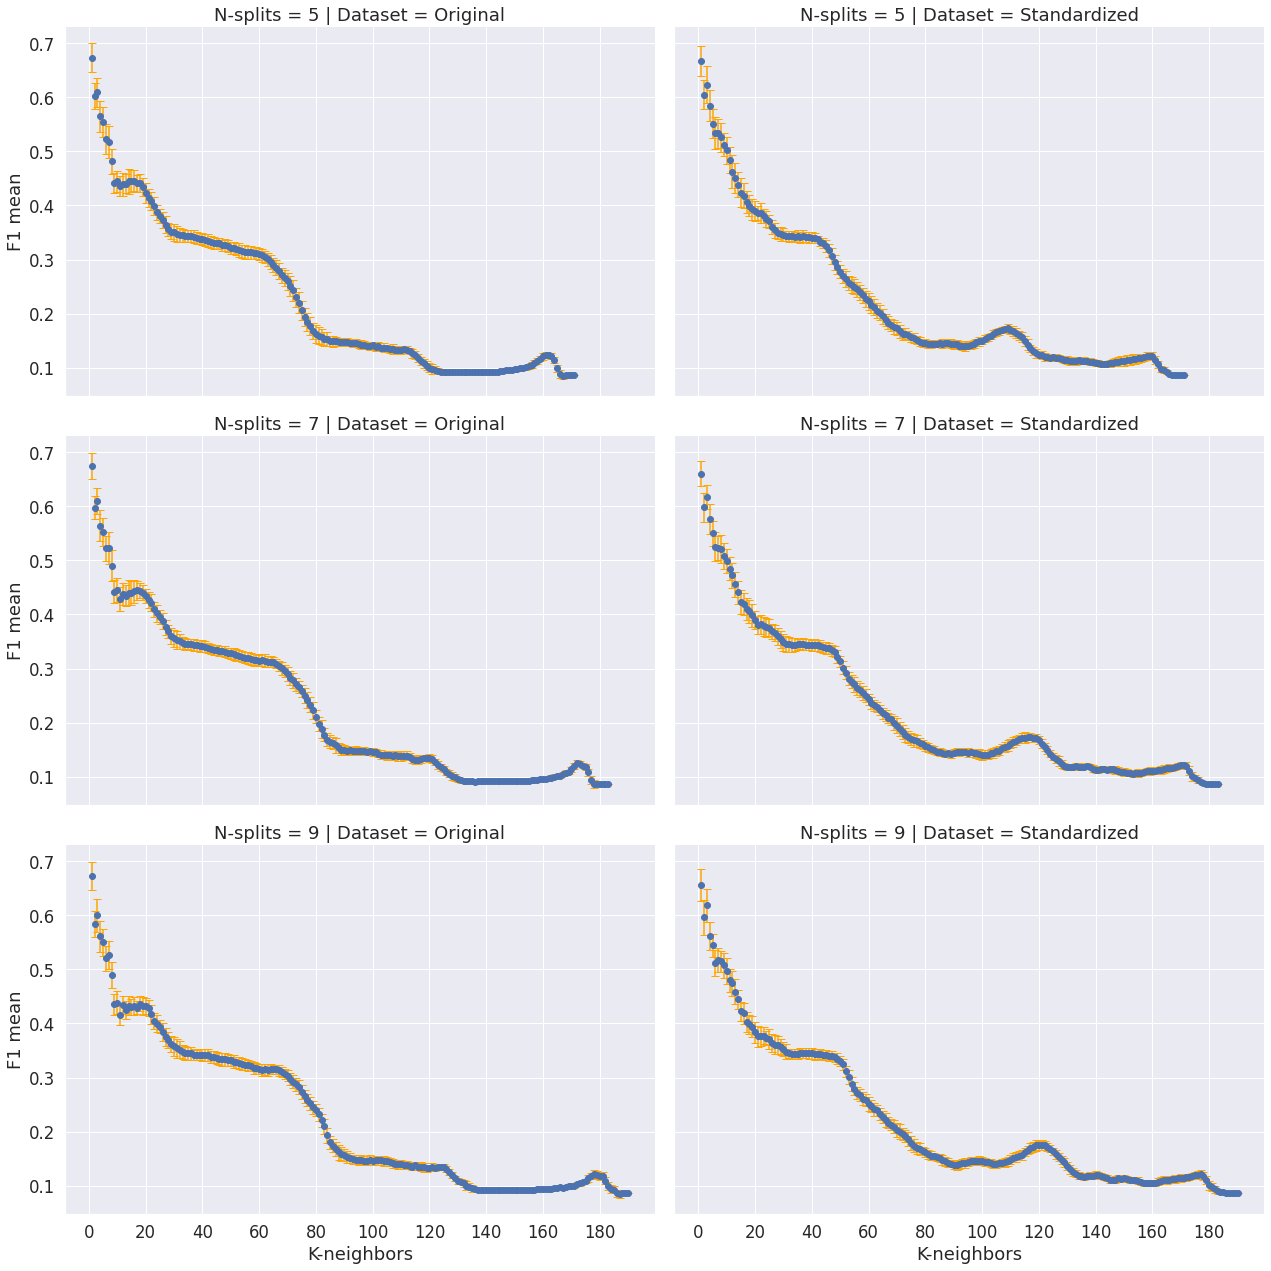

In [11]:
data = df_results[(df_results['Distance'] == 'Euclidean') 
                  & (df_results['Weight'] == 'uniform')]

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data, col="Dataset", row="N-splits", height=6, aspect=1.5)
g.set(xticks=np.arange(0, len(data), 20))
g.map(plt.errorbar, "K-neighbors", "F1 mean", "F1 std", capsize=4, ls='none', fmt='o', ecolor='orange')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_grid.png'), bbox_inches='tight')

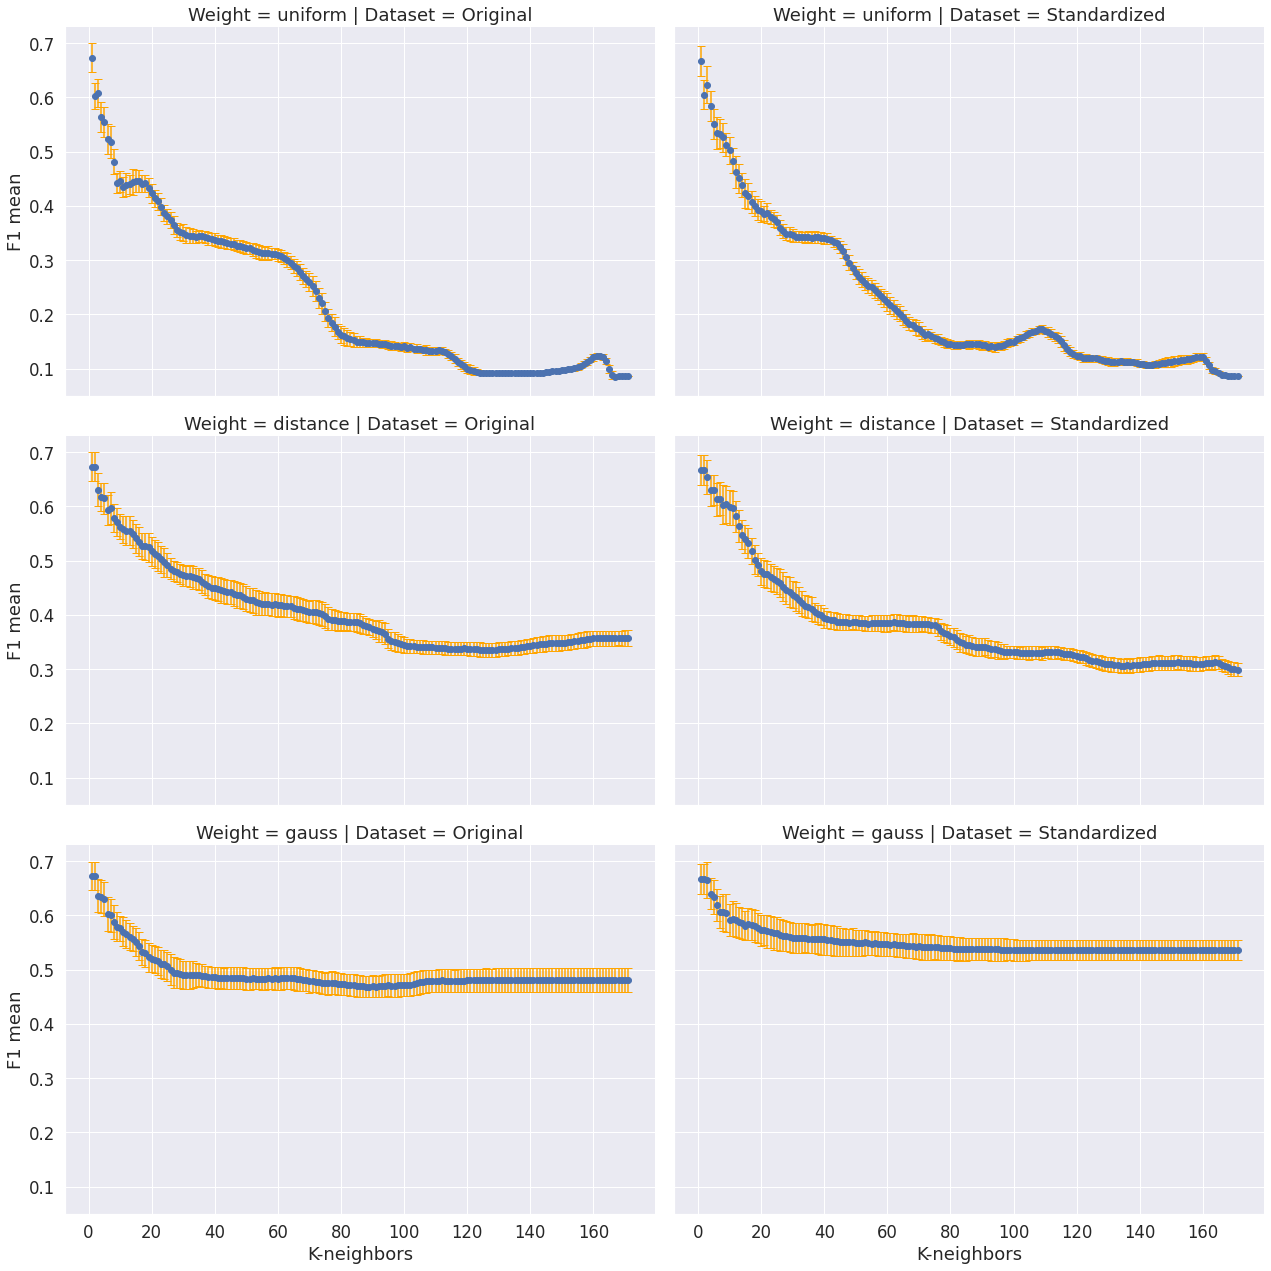

In [12]:
data_weight = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5)]

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_weight, col="Dataset", row="Weight", height=6, aspect=1.5)
g.set(xticks=np.arange(0, len(data_weight), 20))
g.map(plt.errorbar, "K-neighbors", "F1 mean", "F1 std", capsize=4, ls='none', fmt='o', ecolor='orange')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_weight_grid.png'), bbox_inches='tight')

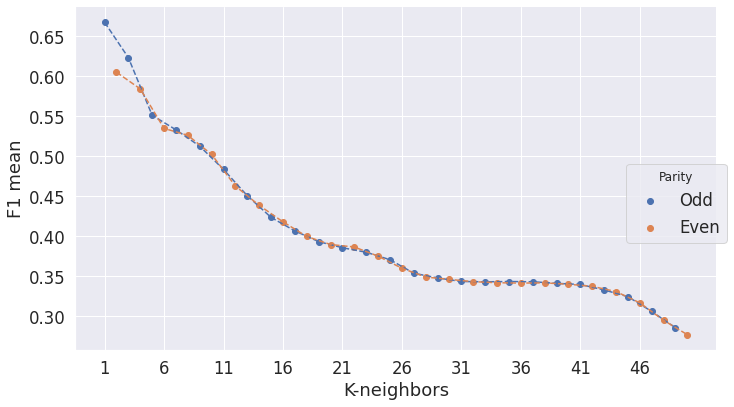

In [13]:
data_even_odd = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5) 
                         & (df_results['Dataset'] == 'Standardized') 
                         & (df_results['Weight'] == 'uniform')].copy()

data_even_odd = data_even_odd[data_even_odd['K-neighbors'] < 51]

data_even_odd['Parity'] = 'None'
data_even_odd.loc[data_even_odd['K-neighbors'] % 2 == 0, 'Parity'] = 'Even'
data_even_odd.loc[data_even_odd['K-neighbors'] % 2 == 1, 'Parity'] = 'Odd'


sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_even_odd, hue='Parity', height=6, aspect=1.5)
g.set(xticks=np.arange(1, len(data_even_odd), 5))
g.map(plt.scatter, "K-neighbors", "F1 mean").add_legend(frameon=True)
g.map(plt.plot, "K-neighbors", "F1 mean", linestyle='--')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_even_odd.png'), bbox_inches='tight')

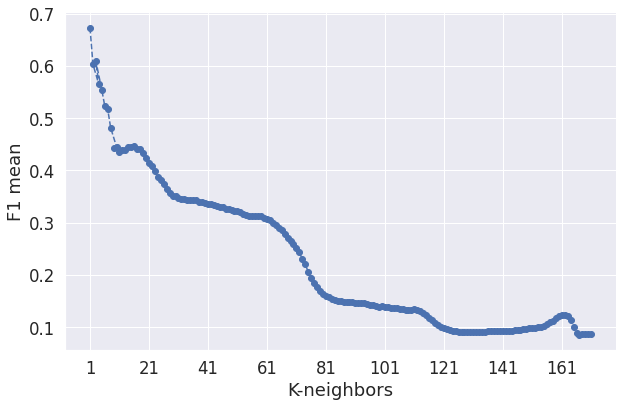

In [14]:
data_detail = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5) 
                         & (df_results['Dataset'] == 'Original') 
                         & (df_results['Weight'] == 'uniform')].copy()

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_detail, height=6, aspect=1.5)
g.set(xticks=np.arange(1, len(data_detail), 20))
g.map(plt.scatter, "K-neighbors", "F1 mean")
g.map(plt.plot, "K-neighbors", "F1 mean", linestyle='--')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_detail.png'), bbox_inches='tight')

In [15]:
data_detail

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
1           5            30  uniform            1           2  0.672764   
4           5            30  uniform            2           2  0.603076   
8           5            30  uniform            4           2  0.564463   
11          5            30  uniform            3           2  0.608817   
14          5            30  uniform            5           2  0.554215   
..        ...           ...      ...          ...         ...       ...   
500         5            30  uniform          167           2  0.085098   
502         5            30  uniform          168           2  0.087347   
507         5            30  uniform          169           2  0.087347   
509         5            30  uniform          170           2  0.087347   
514         5            30  uniform          171           2  0.087347   

           F1 std            F1   Dataset   Distance     F1 up   F1 down  
1    2.660247e-02  67.3% ± 2.7%  Original  Euclidean  0.699367  0.646162  
4    2.404837e-02  60.3% ± 2.4%  Original  Euclidean  0.627124  0.579028  
8    2.791246e-02  56.4% ± 2.8%  Original  Euclidean  0.592376  0.536551  
11   2.597044e-02  60.9% ± 2.6%  Original  Euclidean  0.634787  0.582846  
14   2.801342e-02  55.4% ± 2.8%  Original  Euclidean  0.582228  0.526201  
..            ...           ...       ...        ...       ...       ...  
500  4.957026e-03   8.5% ± 0.5%  Original  Euclidean  0.090055  0.080141  
502  4.336809e-19   8.7% ± 0.0%  Original  Euclidean  0.087347  0.087347  
507  4.336809e-19   8.7% ± 0.0%  Original  Euclidean  0.087347  0.087347  
509  4.336809e-19   8.7% ± 0.0%  Original  Euclidean  0.087347  0.087347  
514  4.336809e-19   8.7% ± 0.0%  Original  Euclidean  0.087347  0.087347  

[171 rows x 12 columns]

In [16]:
df_results[(df_results['F1 mean'] == df_results['F1 mean'].max())]

N-splits  RandomStates    Weight  K-neighbors Minkowski-p   F1 mean  \
1            5            30   uniform            1           1  0.695443   
514          5            30  distance            1           1  0.695443   
516          5            30  distance            2           1  0.695443   
1026         5            30     gauss            1           1  0.695443   
1029         5            30     gauss            2           1  0.695443   

        F1 std            F1       Dataset   Distance     F1 up   F1 down  
1     0.022799  69.5% ± 2.3%  Standardized  Manhattan  0.718242  0.672644  
514   0.022799  69.5% ± 2.3%  Standardized  Manhattan  0.718242  0.672644  
516   0.022799  69.5% ± 2.3%  Standardized  Manhattan  0.718242  0.672644  
1026  0.022799  69.5% ± 2.3%  Standardized  Manhattan  0.718242  0.672644  
1029  0.022799  69.5% ± 2.3%  Standardized  Manhattan  0.718242  0.672644

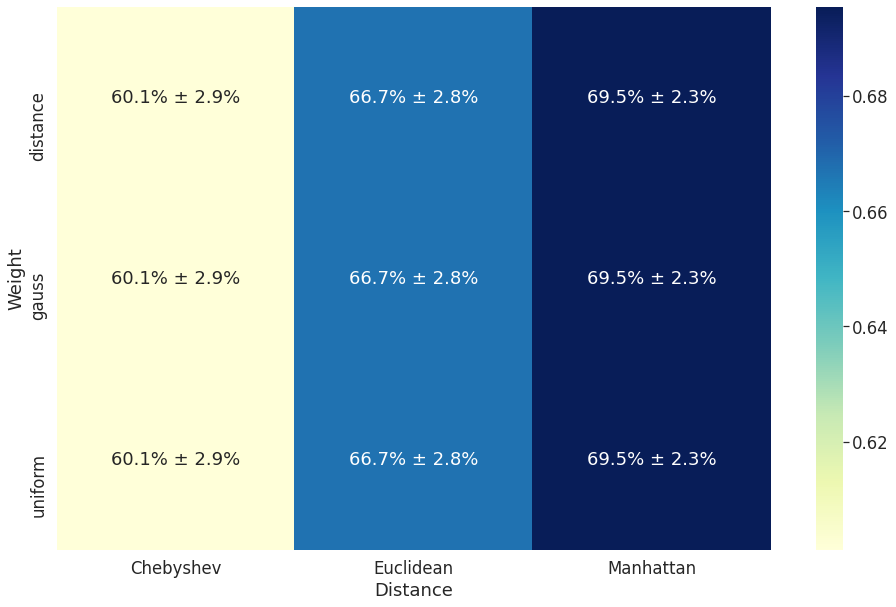

In [18]:
def plot_heatmap(df):
    temp = pd.DataFrame()
    temp['Weight'] = df['Weight']
    temp['Distance'] = df['Distance']
    temp['F1 mean'] = df['F1 mean']
    temp['Labels'] = df['F1']
    
    temp_data = temp.pivot(index='Weight', columns='Distance', values='F1 mean')
    temp_labels = temp.pivot(index='Weight', columns='Distance', values='Labels')

    plt.figure(figsize=(16, 10))
    sns.heatmap(temp_data, annot=temp_labels.to_numpy(), fmt='', cmap="YlGnBu")
    
    plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_heatmap.png'))

    
heatmap_data = df_results[(df_results['K-neighbors'] == 1) 
                          & (df_results['N-splits'] == 5)
                         & (df_results['Dataset'] == 'Standardized')]
plot_heatmap(heatmap_data)